In [ ]:
"""ACCES DOSSIER PARENTS """
import sys 
import os 
sys.path.append(os.path.abspath(".."))

# House Price Prediction - Machine Learning Pipeline 


Ce projet vise à prédire les prix de l'immobilier à l'aide d'un pipeline d'apprentissage automatique complet et structuré.


## The Workflow  : 
- -**Data Loading**
- -**Exploratory Data Analysis**
- -**Data preparation**
- -**Model Training and evaluation**
- -**Final model testing**

## Imports

In [11]:
from src.data_loading import load_data 
from src.preparation import prepare_data
from src.split import split_data
from src.preprocessing import scale_data ,final_training
from src.baseline import baseline 
from src.evaluation import evaluate 
from src.cross_validation import cross_validate
from src.eda import plot_target_distribution , outlier,info,desc,corr

## Data Loading 

In [12]:

data = load_data("..\data\processed\ParisHousing_processed.csv")

<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\kouam\AppData\Local\Temp\ipykernel_27564\3505158706.py:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  data = load_data("..\data\processed\ParisHousing_processed.csv")


## Exploratory Data Analysis (EDA)

DATASET INFORMATION 
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityPartRange      10000 non-null  int64  
 6   numPrevOwners      10000 non-null  int64  
 7   isNewBuilt         10000 non-null  int64  
 8   hasStormProtector  10000 non-null  int64  
 9   basement           10000 non-null  int64  
 10  attic              10000 non-null  int64  
 11  garage             10000 non-null  int64  
 12  hasStorageRoom     10000 non-null  int64  
 13  hasGuestRoom       10000 non-null  int64  
 14  price              10000 non-null  float64
dtypes: float64(1), int64(14)
memory usage: 1.1 MB
DESCRIPTION STA

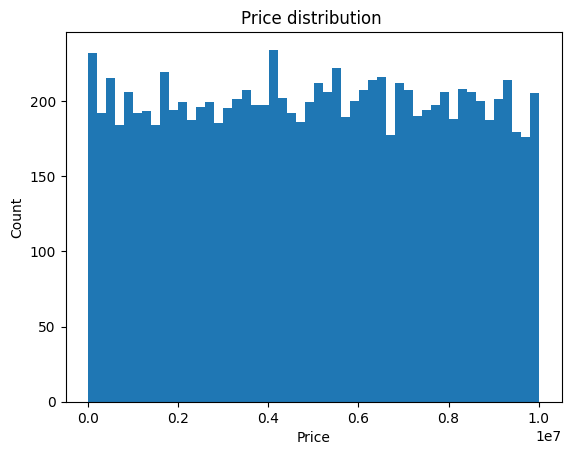

OUTLIER IDENTIFICATION


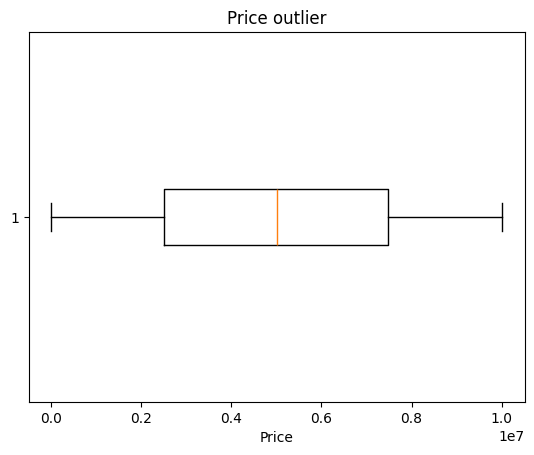

In [22]:
print("DATASET INFORMATION ")
info(data)

print("DESCRIPTION STATISTICS")
desc(data)

print("CORRELATION AVEC LA TARGET  ")
corr(data)

print(" DISTRIBUTION DE LA TARGET ")
plot_target_distribution(data)

print("OUTLIER IDENTIFICATION")
outlier(data)

La variable cible présente une forte relation linéaire avec plusieurs caractéristiques, en particulier « squareMeters », ce qui explique pourquoi les modèles linéaires fonctionnent très bien.

## Data Preparation 
L'ensemble de données est divisé en caractéristiques (X) et variable cible (y).

In [14]:
X,y = prepare_data(data)


## Train / Validation / Test Split 

L'ensemble de données est divisé selon les proportions suivantes  : 
 - - 70% Training
 - - 15% Validation 
 - - 15% Test 

In [15]:
X_train , X_val ,X_test,y_train,y_val,y_test = split_data(X,y)

## Baseline Model 
 Un modèle de référence est utilisé pour établir un seuil de performance minimum.
 Ici, nous prédisons la moyenne de la cible d'entraînement .

In [16]:
#Baseline
y_pred_baseline = baseline(y_test , y_train)
   #Evaluation baseline 
mse,mae,r2,rmse,relative_error = evaluate(y_test,y_pred_baseline)

print("Baseline Results")
print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"RMSE : {rmse}")
print(f"R2 : {r2}")
print(f"Relative Error : {relative_error}")

Baseline Results
MSE : 8607301656718.14
MAE : 2540481.8320873906
RMSE : 2933820.31772877
R2 : -0.0011903305667391173
Relative Error : 3.2377082430384556


## Model Selection via  Cross-Validation

La régression linéaire et la régression Ridge sont évaluées à l'aide d'une validation croisée
afin d'identifier le modèle le plus performant.

In [17]:
cross_validate(X_train,y_train)

LES METRICS D'EVALUATIONS DU MODEL DE REGRESSION LINEAIRE 
-------------------------------------------------
MAE : -1479.1272976737605 | 23.103587864602126
MSE : -3615944.142264048 | 83459.1471597614
RMSE: -1901.4375032931566| 21.89893454795672
R2  : 0.9999995562924301  | 1.4703256079644397e-08
--------------------------------------------------
LES METRICS D'EVALUATIONS DU MODEL RIDGE
MAE : -1545.2511023554553 | 18.25098937064518
MSE : -3879297.1904473947 | 62410.75700374326
RMSE: -1969.5293937991555| 15.847946508154717
R2  : 0.9999995240403058  | 1.1164739477628287e-08
--------------------------------------------------


- -A la sortir de la Cross-validation nous allons choisir la **REGRESSION LINEAIRE** car les metrics tels que la moyenne MAE,MSE,RMSE,R2 sont meilleur que celle du model **RIDGE**



## Data Preprocessing (Scaling) 
La normalisation est appliquée pour garantir que toutes les caractéristiques ont une moyenne nulle et une variance unitaire. 

In [18]:
X_train_scaled,X_val_scaled,X_test_scaled = scale_data(X_train,X_val,X_test)

## Final Model Training 

Le modèle final est entraîné sur l'ensemble de données d'entraînement mis à l'échelle. 

In [19]:
final_model = final_training(X_train_scaled,y_train)

## Validation Evaluate 

In [20]:
#Prediction avec X_val_scaled
y_val_pred = final_model.predict(X_val_scaled)
   #Evaluation de y_val_pred
mse_val,mae_val,r2_val,rmse_val,relative_error_val = evaluate(y_val,y_val_pred)
print("Validation Results")
print(f"MSE : {mse_val}")
print(f"MAE : {mae_val}")
print(f"RMSE : {rmse_val}")
print(f"R2 : {r2_val}")
print(f"Relative Error : {relative_error_val}")

Validation Results
MSE : 3706902.03332827
MAE : 1507.3771996412565
RMSE : 1925.3316683959338
R2 : 0.9999995612662235
Relative Error : 0.0009483959220943863


Les resultats de la validation nous montre une forte **R2_score**  et une faible **relative_error**,indique que le model generalise bien et ne souffre pas d'overfitting

## Final Test Evaluation 

In [21]:
#Final_test 
y_test_pred = final_model.predict(X_test_scaled)
   #Evaluation
mse_test,mae_test,r2_test,rmse_test,relative_error_test = evaluate(y_test,y_test_pred)
print("Final Test Results")
print(f"MSE : {mse_test}")
print(f"MAE : {mae_test}")
print(f"RMSE : {rmse_test}")
print(f"R2 : {r2_test}")
print(f"Relative Error : {relative_error_test}")

Final Test Results
MSE : 3502550.284694914
MAE : 1462.2236843970325
RMSE : 1871.510161525957
R2 : 0.9999995925878263
Relative Error : 0.0009791989947770777


Comparerer a la baseline , le model final reduit significativement MAE and RMSE,demontre l'utiliter des fonctionnalites selectionnes 

## Conclusion 


- -Le modèle de régression linéaire atteint d'excellentes performances avec
une erreur relative inférieure à 0,1 % sur les ensembles de validation et de test.

- -Cela confirme la forte dépendance linéaire entre la variable cible
et les caractéristiques clés telles que « squareMeters ».

- -Le pipeline est robuste et peut être étendu à des modèles
ou des ensembles de données plus complexes à l'avenir.


## SAUVEGARDE DU MODEL DANS final_model.pkl

In [23]:
import pickle 

In [25]:
# Chemin vers le fichier sauvegarder 
model_path = "../models/final_model.pkl"

with open(model_path,"wb") as f:
    pickle.dump(final_model, f)
print("Modele final sauvegarde avec succes !")

Modele final sauvegarde avec succes !


In [26]:
with open("../models/final_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
print("Modele charge avec succes ")

Modele charge avec succes 


## Test 

In [27]:
y_test_loaded = loaded_model.predict(X_test_scaled)

In [28]:
y_test_loaded

array([[4621213.09697436],
       [1349172.59568986],
       [ 671468.79247129],
       ...,
       [6430172.14095777],
       [5630617.86786597],
       [2364930.09377218]], shape=(1500, 1))